In [1]:
import numpy as np
import pandas as pd

## 3. 산술 연산과 데이터 정렬

In [2]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a', 'c', 'e', 'f', 'g'])

In [3]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [4]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [5]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [6]:
df1 = pd.DataFrame(np.arange(12).reshape(3, 4), columns = list('abcd'))
df2 = pd.DataFrame(np.arange(20).reshape(4, 5), columns = list('abcde'))
df2.loc[1, 'b'] = np.nan

In [7]:
df1

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [8]:
df2

,a,b,c,d,e
0,0,1.0,2,3,4
1,5,NaN,7,8,9
2,10,11.0,12,13,14
3,15,16.0,17,18,19


In [9]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [10]:
df1.add(df2, fill_value=0) # 값이 없는 원소들은 0으로 지정을 한 뒤에 add

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [11]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
            columns = list('bde'),
            index = ['Utah', 'Ohio', 'Texas', 'Oregon'])

series = frame.iloc[0]

In [12]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [13]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [14]:
frame - series # 2차원 - 1차원

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [15]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [16]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [17]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [18]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [19]:
frame.sub(series3, axis='index') # 2차원 - 1차원

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


## 4. 함수 적용과 매핑

In [20]:
frame = pd.DataFrame(np.arange(12).reshape(4,3), columns= list('bde'),
                     index = ["Utah", "Ohio", "Texas", "Oregon"])
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [21]:
# 컬럼별 합계
frame.sum() # pandas에서는 numpy와 다르게 axis=0이 기본값으로 지정

b    18
d    22
e    26
dtype: int64

In [22]:
frame.sum(axis=0)

b    18
d    22
e    26
dtype: int64

In [23]:
# 행별 합계
frame.sum(axis=1) # frame.sum(axis='columns')

Utah       3
Ohio      12
Texas     21
Oregon    30
dtype: int64

In [24]:
# 컬럼별 합계
np.sum(frame) # axis=0(행축)을 따라서 합이 계산

b    18
d    22
e    26
dtype: int64

In [25]:
# 행별 합계
np.sum(frame, axis=1)

Utah       3
Ohio      12
Texas     21
Oregon    30
dtype: int64

In [26]:
frame.mean()

b    4.5
d    5.5
e    6.5
dtype: float64

In [27]:
frame.min(axis=0)

b    0
d    1
e    2
dtype: int64

In [28]:
frame.max(axis=1)

Utah       2
Ohio       5
Texas      8
Oregon    11
dtype: int64

In [29]:
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [30]:
frame.max(axis=0) - frame.min(axis=0)

b    9
d    9
e    9
dtype: int64

In [31]:
frame.max(axis=0) - frame.min(axis=0)

b    9
d    9
e    9
dtype: int64

In [32]:
# 위의 코드를 나만의 함수로 만들어서 적용 (동일한 결과)
def range_f(x):  # x는 frame을 행축으로 색인한 series
  return x.max() - x.min()
frame.apply(range_f, axis=1) # axis=0 이 기본값

Utah      2
Ohio      2
Texas     2
Oregon    2
dtype: int64

In [33]:
# applymap은 모든 원소에 어떤 함수를 적용할 때

In [34]:
x = 0.45678
'%.2f'%x

'0.46'

In [35]:
def fmt(x):
  return '%.2f'%x

In [36]:
frame.applymap(fmt) # applymap은 frame 전체 원소에 fmt 함수를 적용

,b,d,e
Utah,0.00,1.00,2.00
Ohio,3.00,4.00,5.00
Texas,6.00,7.00,8.00
Oregon,9.00,10.00,11.00


In [37]:
frame.applymap(lambda x: '%.2f'%x) # lambda함수로 대체

,b,d,e
Utah,0.00,1.00,2.00
Ohio,3.00,4.00,5.00
Texas,6.00,7.00,8.00
Oregon,9.00,10.00,11.00


In [38]:
frame['b'].applymap(fmt) # series 데이터에는 applymap을 적용할 수 없고, 대신 map 함수 사용

AttributeError: ignored

In [39]:
frame['b'].map(fmt)

Utah      0.00
Ohio      3.00
Texas     6.00
Oregon    9.00
Name: b, dtype: object

### Workshop

In [40]:
import seaborn as sns # 시각화 모듈

In [41]:
titanic = sns.load_dataset('titanic') # 데이터를 DataFrame으로 반환

In [42]:
type(titanic)

pandas.core.frame.DataFrame

In [43]:
# 데이터 훑어보기
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- 두 열(age, fare)만 색인해서 DataFrame으로 만들기

In [44]:
df = titanic[['age', 'fare']]
df

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


- 각 열의 최댓값과 최솟값 구하기

In [45]:
df.max(axis=0) # 컬럼별(age, fare)로 최댓값

age      80.0000
fare    512.3292
dtype: float64

In [46]:
df.min(axis=0) # 컬럼별(age, fare)로 최솟값

age     0.42
fare    0.00
dtype: float64

- 각 열의 "최댓값과 최솟값의 차이" 구하기 (apply 함수 이용)

In [47]:
df.max(axis=0) - df.min(axis=0)

age      79.5800
fare    512.3292
dtype: float64

In [48]:
df.apply(lambda x:x.max() - x.min())

age      79.5800
fare    512.3292
dtype: float64

- 모든 원소의 포맷을 소수점 두자리로 맞추기

In [49]:
f = lambda x:'%.2f'%x

df.applymap(f)

,age,fare
0,22.00,7.25
1,38.00,71.28
2,26.00,7.92
3,35.00,53.10
4,35.00,8.05
...,...,...
886,27.00,13.00
887,19.00,30.00
888,nan,23.45
889,26.00,30.00


- 누락된 값(NaN)이 있는지 Bool 값으로 확인하기

In [50]:
df.isnull()

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
886,False,False
887,False,False
888,True,False
889,False,False


## 5. 정렬과 순위

In [51]:
obj = pd.Series(np.arange(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [52]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [53]:
obj.sort_values()

d    0
a    1
b    2
c    3
dtype: int64

In [54]:
frame = pd.DataFrame(np.arange(8).reshape(2,4),
                     index = ['three', 'one'],
                     columns = ['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [55]:
frame.sort_index(axis=0) # index 자체를 정렬

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [56]:
frame.sort_index(axis=1) # column 자체를 정렬

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [57]:
frame = pd.DataFrame({'b':[4, 7, -3, 2], 'c':[0, 1, 0, 1]})
frame

,b,c
0,4,0
1,7,1
2,-3,0
3,2,1


In [58]:
frame.sort_values(by='b', axis=0)

,b,c
2,-3,0
3,2,1
0,4,0
1,7,1


In [59]:
frame.sort_values(by='c', axis=0, ascending=False)

,b,c
1,7,1
3,2,1
0,4,0
2,-3,0


In [60]:
frame.sort_values(by=['c', 'b'], axis=0) # 계층적으로 정렬

,b,c
2,-3,0
0,4,0
3,2,1
1,7,1


## 6. 중복색인

In [61]:
obj = pd.Series(np.arange(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [62]:
obj.index

Index(['a', 'a', 'b', 'b', 'c'], dtype='object')

In [63]:
obj.index.is_unique

False

In [64]:
obj['a']

a    0
a    1
dtype: int64

In [65]:
obj['b']

b    2
b    3
dtype: int64

In [66]:
df = pd.DataFrame(np.random.randn(4,3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,2.270526,1.013848,0.384570
a,-0.274766,-0.122444,0.099597
b,0.643910,-0.005173,-0.163963
b,1.321941,1.654353,1.031565


In [67]:
df.loc['b']

,0,1,2
b,0.643910,-0.005173,-0.163963
b,1.321941,1.654353,1.031565


## 7. 기술 통계 계산과 요약

In [68]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [69]:
df.sum() # axis=0 기본값

one    9.25
two   -5.80
dtype: float64

In [70]:
df.sum(axis=0, skipna=True) # skipna=True 기본값

one    9.25
two   -5.80
dtype: float64

In [71]:
df.sum(axis=1, skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [72]:
# numpy : 최대값과 최소값의 위치를 구할 때 argmax(), argmin()
# pandas : 최대값과 최소값의 위치를 구할 때 idxmax(), idxmin()

In [73]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [74]:
df.idxmax() # 행축을 따라서 최대값의 index

one    b
two    d
dtype: object

In [75]:
df.cumsum() # 행축을 따라서 누적합이 계산

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [76]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [77]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [78]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [79]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [80]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 7.1 상관관계와 공분산

In [81]:
df = pd.DataFrame({"math" : [50, 60, 40, 30, 70, 50], "physics" : [40, 60, 50, 20, 80, 50]})
df

,math,physics
0,50,40
1,60,60
2,40,50
3,30,20
4,70,80
5,50,50


- 산포도(산점도)

In [ ]:
# pandas, matplotlib, seaborn,

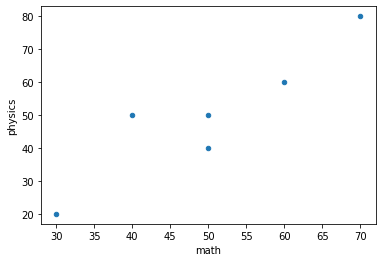

In [83]:
df.plot(kind="scatter", x="math", y="physics") # 기본형 : 선그래프

- 상관계수

In [84]:
df.corr()

,math,physics
math,1.000000,0.919239
physics,0.919239,1.000000


### 7.2 범주 데이터 요약

In [85]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [87]:
titanic.describe(include="object")

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [89]:
titanic["embarked"].unique() # unique한 원소들

array(['S', 'C', 'Q', nan], dtype=object)

In [90]:
titanic["embarked"].nunique() # unique한 원소들의 갯수

3

In [91]:
titanic["embarked"].value_counts() # 고유값(unique한 원소들)의 빈도수(건수)

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [98]:
pd.value_counts(titanic["embarked"])

S    644
C    168
Q     77
Name: embarked, dtype: int64

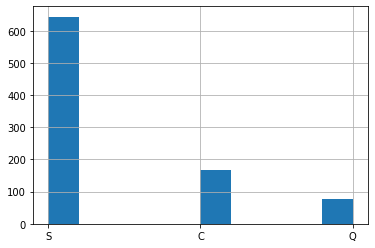

In [96]:
titanic["embarked"].hist()